<a href="https://colab.research.google.com/github/ReynaraEzra/Machine-Learning-Time-Series/blob/main/Delhi_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
!pip install ipython-autotime
%load_ext autotime

time: 423 µs (started: 2021-07-01 14:29:14 +00:00)


In [3]:
df_train = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


time: 46.6 ms (started: 2021-07-01 14:29:45 +00:00)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
time: 26.6 ms (started: 2021-07-01 14:30:05 +00:00)


In [6]:
df_train.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

time: 9.03 ms (started: 2021-07-01 14:30:18 +00:00)


In [7]:
df_train.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

time: 11.2 ms (started: 2021-07-01 14:30:27 +00:00)


In [8]:
import matplotlib.pyplot as plt

dates = df_train['date'].values
temp = df_train['meantemp'].values
humidity = df_train['humidity'].values
wind = df_train['humidity'].values
press = df_train['meanpressure'].values

time: 7.28 ms (started: 2021-07-01 14:32:43 +00:00)


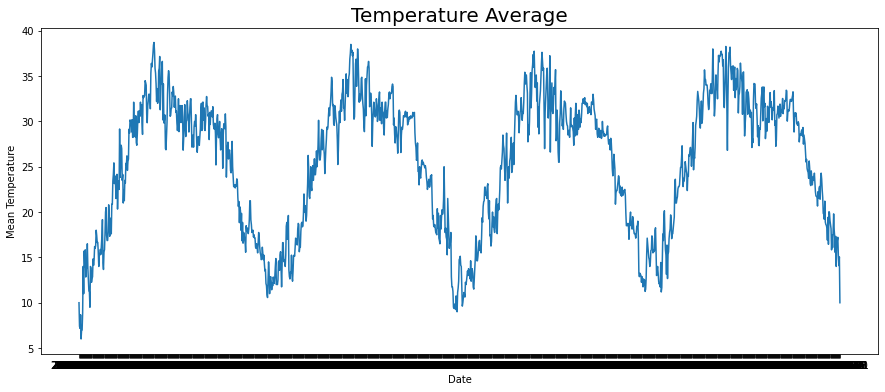

time: 13.1 s (started: 2021-07-01 14:34:34 +00:00)


In [10]:
plt.figure(figsize=(15,6))

plt.plot(dates, temp)
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('Temperature Average', fontsize=20)
plt.show()

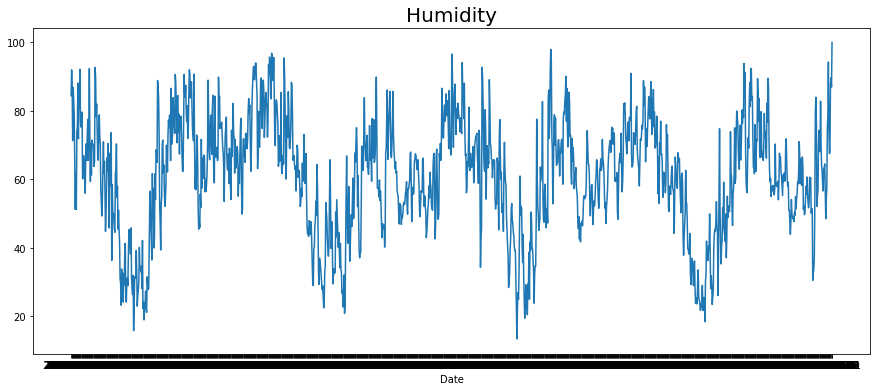

time: 13.4 s (started: 2021-07-01 14:36:39 +00:00)


In [12]:
plt.figure(figsize=(15,6))

plt.plot(dates, humidity)
plt.xlabel('Date')
plt.title('Humidity', fontsize=20)
plt.show()

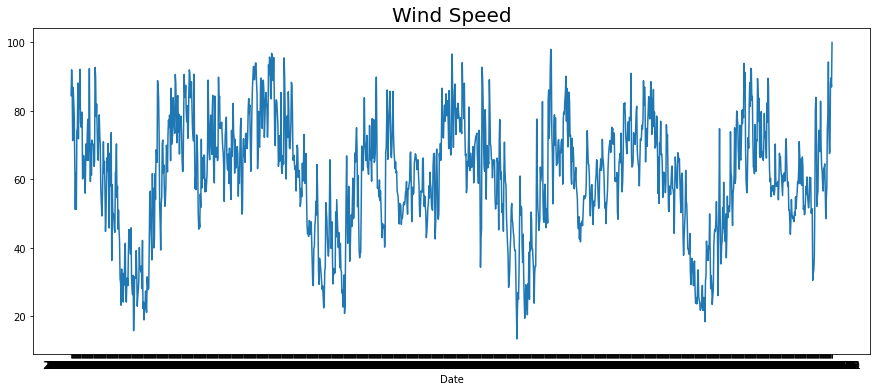

time: 13.1 s (started: 2021-07-01 14:37:12 +00:00)


In [13]:
plt.figure(figsize=(15,6))

plt.plot(dates, wind)
plt.xlabel('Date')
plt.title('Wind Speed', fontsize=20)
plt.show()

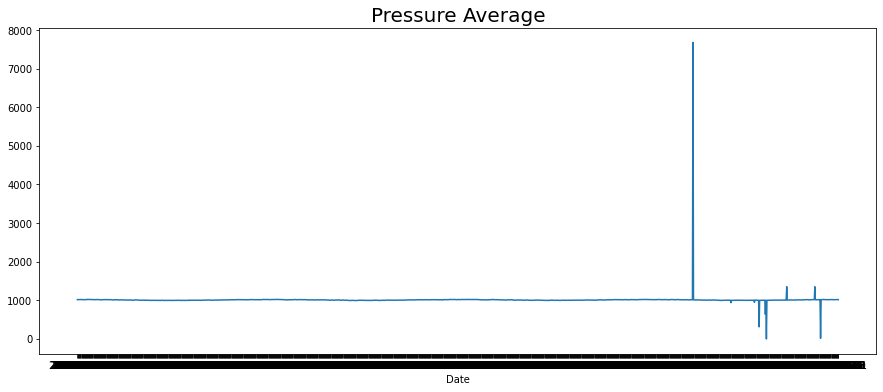

time: 12.9 s (started: 2021-07-01 14:37:27 +00:00)


In [14]:
plt.figure(figsize=(15,6))

plt.plot(dates, press)
plt.xlabel('Date')
plt.title('Pressure Average', fontsize=20)
plt.show()

In [15]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

time: 5.74 ms (started: 2021-07-01 14:39:20 +00:00)


In [16]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

time: 350 ms (started: 2021-07-01 14:40:09 +00:00)


In [18]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss='Huber',
              optimizer=optimizer,
              metrics=["mae"])

time: 13 ms (started: 2021-07-01 14:41:02 +00:00)


In [19]:
history = model.fit(train_set,epochs=100)

Epoch 1/100
15/15 [==============================] - 6s 114ms/step - loss: 25.4617 - mae: 25.9617
Epoch 2/100
15/15 [==============================] - 2s 110ms/step - loss: 25.3188 - mae: 25.8188
Epoch 3/100
15/15 [==============================] - 2s 109ms/step - loss: 25.2006 - mae: 25.7006
Epoch 4/100
15/15 [==============================] - 2s 106ms/step - loss: 25.0923 - mae: 25.5923
Epoch 5/100
15/15 [==============================] - 2s 107ms/step - loss: 24.9835 - mae: 25.4835
Epoch 6/100
15/15 [==============================] - 2s 110ms/step - loss: 24.8724 - mae: 25.3724
Epoch 7/100
15/15 [==============================] - 2s 107ms/step - loss: 24.7502 - mae: 25.2502
Epoch 8/100
15/15 [==============================] - 2s 107ms/step - loss: 24.6147 - mae: 25.1147
Epoch 9/100
15/15 [==============================] - 2s 109ms/step - loss: 24.4642 - mae: 24.9642
Epoch 10/100
15/15 [==============================] - 2s 106ms/step - loss: 24.2816 - mae: 24.7816
Epoch 11/100
15/15 